# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

# Import API key
from api_keys_1 import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

In [3]:
#cities

In [4]:
original_cities = cities
#cities =["London", "Boston","Cape Town", "Sydney", "Rachel City"]

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL. PUT THIS IN FOR LOOP.
query_url = url + "appid="+ weather_api_key + "&q=" + city


In [6]:
# #Looking at json print to see categories on test city, London
# test_query_url = f"{url}appid={weather_api_key}&units={units}&q={testcity}"
# testcity = "London"
# weather_response = requests.get(test_query_url)
# weather_json = weather_response.json()
# print(json.dumps(weather_json, indent=2))

In [7]:
#Lists to hold response information:

cityname = []
lat = []
lng = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

#City and set counters initializing
counter = 0
setnumber = 1

#Loop through the city list and perform data requests
print("Beginning Data Retrieval")
print("------------------------")
for city in cities:
    query_url = url + "appid="+ weather_api_key + "&q=" + city + "&units=" +"imperial"
    try:
        response=requests.get(query_url).json()
        cityname.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        #Including the counters within the for loop so the print statement updates
        if counter == 50:
            counter = 1
            setnumber += 1

        else:
            counter += 1

        
        #Printing each record for every city
        print(f"Processing Record {counter} of Set {setnumber} | {city}")
        
        time.sleep(1)
    except:
        print(f"City {city} not found. Skipping...")
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | beyneu
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | devils lake
Processing Record 6 of Set 1 | nizwa
Processing Record 7 of Set 1 | vila velha
Processing Record 8 of Set 1 | shingu
Processing Record 9 of Set 1 | krasnyye tkachi
Processing Record 10 of Set 1 | howard springs
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | ust-ilimsk
Processing Record 14 of Set 1 | fairbanks
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | dalby
Processing Record 18 of Set 1 | gat
Processing Record 19 of Set 1 | mataura
City vaitupu not found. Skipping...
City tungkang not found. Skipping...
City nguiu not found. Skipping...
Processing Record 20 of Set 1 | kieta
Processing Record 21 of Set 1 | wai

Processing Record 30 of Set 4 | tiznit
Processing Record 31 of Set 4 | kuala kedah
Processing Record 32 of Set 4 | kenai
Processing Record 33 of Set 4 | novopavlovka
Processing Record 34 of Set 4 | wattegama
Processing Record 35 of Set 4 | hay river
Processing Record 36 of Set 4 | touros
Processing Record 37 of Set 4 | okhotsk
Processing Record 38 of Set 4 | banjar
Processing Record 39 of Set 4 | minnedosa
Processing Record 40 of Set 4 | burns lake
Processing Record 41 of Set 4 | san carlos
City kobojango not found. Skipping...
Processing Record 42 of Set 4 | lewistown
Processing Record 43 of Set 4 | aksu
Processing Record 44 of Set 4 | kuala terengganu
Processing Record 45 of Set 4 | calbuco
Processing Record 46 of Set 4 | pacific grove
Processing Record 47 of Set 4 | tiarei
Processing Record 48 of Set 4 | trudovoye
Processing Record 49 of Set 4 | mount isa
Processing Record 50 of Set 4 | solnechnyy
City labutta not found. Skipping...
Processing Record 1 of Set 5 | nhulunbuy
Processin

Processing Record 10 of Set 8 | panguna
Processing Record 11 of Set 8 | saint-augustin
Processing Record 12 of Set 8 | sisimiut
City sorvag not found. Skipping...
Processing Record 13 of Set 8 | grand gaube
Processing Record 14 of Set 8 | bambous virieux
Processing Record 15 of Set 8 | hasaki
Processing Record 16 of Set 8 | naousa
Processing Record 17 of Set 8 | tahoua
Processing Record 18 of Set 8 | orzhytsya
Processing Record 19 of Set 8 | upernavik
Processing Record 20 of Set 8 | pochutla
Processing Record 21 of Set 8 | pasighat
Processing Record 22 of Set 8 | luderitz
Processing Record 23 of Set 8 | toora-khem
Processing Record 24 of Set 8 | beringovskiy
Processing Record 25 of Set 8 | monywa
Processing Record 26 of Set 8 | ternate
Processing Record 27 of Set 8 | togane
Processing Record 28 of Set 8 | anchorage
City belushya guba not found. Skipping...
Processing Record 29 of Set 8 | magadan
Processing Record 30 of Set 8 | berlevag
Processing Record 31 of Set 8 | yarim
Processing R

Processing Record 50 of Set 11 | lata
Processing Record 1 of Set 12 | tezu
Processing Record 2 of Set 12 | coihaique
Processing Record 3 of Set 12 | ino
Processing Record 4 of Set 12 | brae
Processing Record 5 of Set 12 | dossor
Processing Record 6 of Set 12 | lac du bonnet
Processing Record 7 of Set 12 | plavinas
Processing Record 8 of Set 12 | mandapeta
Processing Record 9 of Set 12 | waingapu
Processing Record 10 of Set 12 | kawalu
Processing Record 11 of Set 12 | uvat
Processing Record 12 of Set 12 | palana
Processing Record 13 of Set 12 | soe
Processing Record 14 of Set 12 | biskamzha
City karamay not found. Skipping...
Processing Record 15 of Set 12 | indian harbour beach
Processing Record 16 of Set 12 | pamanukan
Processing Record 17 of Set 12 | sistranda
Processing Record 18 of Set 12 | kokologo
Processing Record 19 of Set 12 | kalemie
Processing Record 20 of Set 12 | road town
Processing Record 21 of Set 12 | chenghai
Processing Record 22 of Set 12 | eston
Processing Record 23

In [8]:
#Checking array length for dataframe assembly
print(len(cityname))
print(len(lat))
print(len(lng))
print(len(maxtemp))
print(len(humidity))
print(len(cloudiness))
print(len(windspeed))
print(len(country))
print(len(date))

583
583
583
583
583
583
583
583
583


## Convert Raw Data to DataFrame
* Save as csv

In [9]:
#Create a data frame from the following dictionary:

#Dictionary
weather_dict = {
    "City": cityname,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxtemp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": windspeed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)

#Saving as csv
weather_data.to_csv("Weather CSV")

In [10]:
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,74.62,81,100,20.00,PF,1603079327
1,Jamestown,42.10,-79.24,55.00,62,90,10.29,US,1603079457
2,Beyneu,45.32,55.20,55.72,34,0,13.62,KZ,1603079594
3,Ushuaia,-54.80,-68.30,37.40,74,20,16.11,AR,1603079595
4,Devils Lake,48.11,-98.87,28.40,50,90,12.75,US,1603079409


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

(10/18/2020)


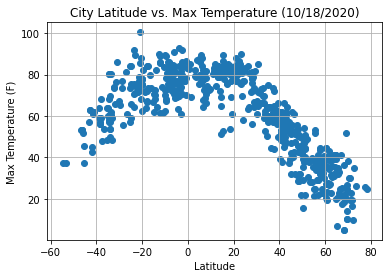

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

#Converting the unix so that it reads from the dataframe date and converts it to month/day/year

todaysdate=datetime.datetime.fromtimestamp(int(date[1])).strftime('(%m/%d/%Y)')
print(todaysdate)


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature "+str(todaysdate))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Max Temperature.png")

# Show plot
plt.show()

In [12]:
#Analysis of City Latitude vs Max Temperature plot:
    #This scatter plot suggests that temperature generally increases as latitude approaches zero. The value of the maximum temperature generally increases if a city's distance is closer to the equator. 
    
    
    
    

### Latitude vs. Humidity Plot

(10/18/2020)


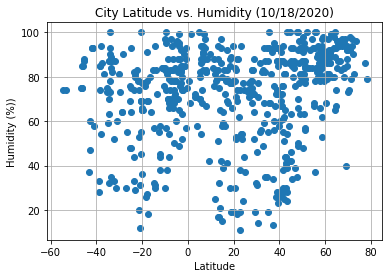

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

#Converting the unix so that it reads from the dataframe date and converts it to month/day/year

todaysdate=datetime.datetime.fromtimestamp(int(date[1])).strftime('(%m/%d/%Y)')
print(todaysdate)


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity "+str(todaysdate))
plt.ylabel("Humidity (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Humidity.png")

# Show plot
plt.show()

In [14]:
#Analysis of City Latitude vs Humidity plot:
    #There was not a clear, visual correlation betwen city latitude and humidity based on this scatter plot. There was a cluster of high humidity just below the equator, as well as a cluster of high humidity around the 60-70 degree latitude.
    
    
    

### Latitude vs. Cloudiness Plot

(10/18/2020)


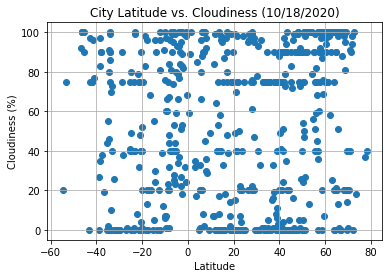

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

#Converting the unix so that it reads from the dataframe date and converts it to month/day/year

todaysdate=datetime.datetime.fromtimestamp(int(date[1])).strftime('(%m/%d/%Y)')
print(todaysdate)


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness "+str(todaysdate))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Cloudiness.png")

# Show plot
plt.show()

In [ ]:
#Analysis of City Latitude vs Cloudiness plot:
    #There is no clear relationship between latitude and cloudiness. Even at a given latitude, the cloudiness data appears to be spread out.

### Latitude vs. Wind Speed Plot

(10/18/2020)


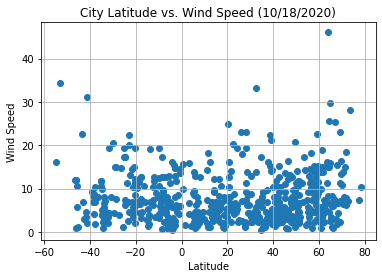

In [16]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

#Converting the unix so that it reads from the dataframe date and converts it to month/day/year

todaysdate=datetime.datetime.fromtimestamp(int(date[1])).strftime('(%m/%d/%Y)')
print(todaysdate)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed "+str(todaysdate))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Wind Speed.png")

# Show plot
plt.show()

In [ ]:
#Analysis of City Latitude vs Wind Speed plot:
    #There is no clear relationship between latitude and wind speed. Wind speeds, however, are generally low. At any given latitude, the wind speed data is dispersed.
    
    
    
    
    

## Linear Regression

### Write linear regression plot function (optional)

In [17]:
#Creating dataframe for southern hemisphere
southerndf=weather_data.loc[weather_data["Lat"]<0]
southerndf


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,74.62,81,100,20.00,PF,1603079327
3,Ushuaia,-54.80,-68.30,37.40,74,20,16.11,AR,1603079595
6,Vila Velha,-20.33,-40.29,68.00,100,90,4.70,BR,1603079450
9,Howard Springs,-12.50,131.05,90.00,55,20,10.29,AU,1603079601
14,Bluff,-46.60,168.33,53.01,75,92,11.99,NZ,1603079415
...,...,...,...,...,...,...,...,...,...
575,Marovoay,-16.10,46.63,73.40,64,20,6.93,MG,1603080234
576,Nísia Floresta,-6.09,-35.21,77.00,78,40,6.93,BR,1603080235
579,Santa Maria,-29.68,-53.81,65.14,73,0,4.47,BR,1603079974
581,Finschhafen,-6.60,147.87,84.78,66,95,4.63,PG,1603080241


In [18]:
#Creating dataframe for northern hemisphere
northerndf=weather_data.loc[weather_data["Lat"]>=0]
northerndf



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Jamestown,42.10,-79.24,55.00,62,90,10.29,US,1603079457
2,Beyneu,45.32,55.20,55.72,34,0,13.62,KZ,1603079594
4,Devils Lake,48.11,-98.87,28.40,50,90,12.75,US,1603079409
5,Nizwá,22.93,57.53,83.50,11,7,4.18,OM,1603079442
7,Shingū,33.73,135.98,60.80,87,75,3.36,JP,1603079550
...,...,...,...,...,...,...,...,...,...
571,Eston,51.15,-108.75,21.99,57,90,4.70,CA,1603080006
572,Teya,60.38,92.63,26.94,91,100,14.97,RU,1603080231
577,Vila,42.03,-8.16,57.99,51,97,1.99,PT,1603080236
578,Kem',64.96,34.58,34.39,96,100,15.88,RU,1603080237


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

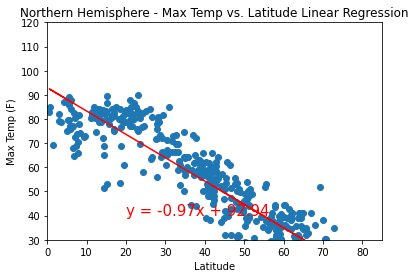

rvalue: -0.9000931619445832
rquared: 0.8101677001793978


<Figure size 432x288 with 0 Axes>

In [28]:
#Northern Hemisphere: max temp vs latitude linear regression

x_values = northerndf['Lat']
y_values = northerndf['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlim(0, 85)
plt.ylim(30, 120)
plt.show()

print("rvalue: " + str(rvalue))
print("rquared: " + str(rvalue**2))

plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")





In [ ]:
#Analysis: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
    #The r-value of -0.9 is close to -1, suggesting a strong negative correlation between max temperature and latitude.
    #The high rsquared value of 0.81 suggests that the model fits the data well, with 81% of the data fitting the regression model.
    
    
    

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

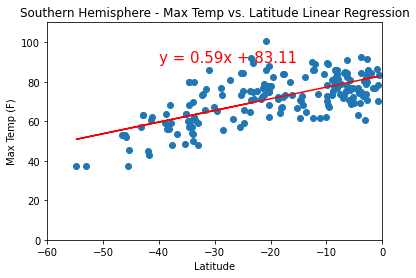

rvalue: 0.6735734849654044
rquared: 0.45370123964843984


<Figure size 432x288 with 0 Axes>

In [29]:
#Southern Hemisphere: max temp vs latitude linear regression

x_values = southerndf['Lat']
y_values = southerndf['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.annotate(line_eq,(-40,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlim(-60, 0)
plt.ylim(0, 110)
plt.show()

print("rvalue: " + str(rvalue))
print("rquared: " + str(rvalue**2))

plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")



In [ ]:
#Analysis: Southern Hemisphere - Max Temp vs. Latitude Linear Regression
    #The r-value of 0.67 is close to 1, suggesting a positive correlation between max temperature and latitude in the Southern Hemisphere.
    #The rsquared value of 0.45 suggests that 45% of the data fits the regression model.
    
    

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

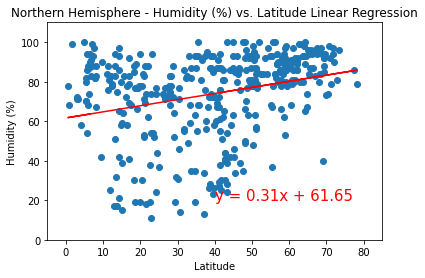

rvalue: 0.2811205350152594
rquared: 0.0790287552072657


<Figure size 432x288 with 0 Axes>

In [30]:
#Northern Hemisphere: humidity vs latitude linear regression

x_values = northerndf['Lat']
y_values = northerndf['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlim(-5, 85)
plt.ylim(0, 110)
plt.show()

print("rvalue: " + str(rvalue))
print("rquared: " + str(rvalue**2))

plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")




In [ ]:
#Analysis: Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
    #The r-value of 0.28 is not very close to one, suggesting a weakly positive correlation between humidity and latitude in the Northern Hemisphere.
    #The rsquared value of implies that only 7% of the data fits the regression model.
    

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

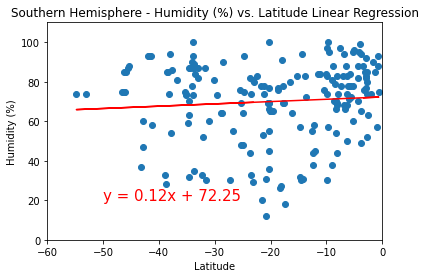

rvalue: 0.08017354433274136
rquared: 0.006427797210874045


<Figure size 432x288 with 0 Axes>

In [31]:
#Southern Hemisphere: humidity vs latitude linear regression

x_values = southerndf['Lat']
y_values = southerndf['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlim(-60, 0)
plt.ylim(0, 110)
plt.show()

print("rvalue: " + str(rvalue))
print("rquared: " + str(rvalue**2))

plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")



In [ ]:
#Analysis: Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
    #The r-value of 0.08 is not very close to 1, suggesting an extremely weak positive correlation between humidity and latitude in the Southern Hemisphere.
    #The rsquared value of implies that only .6% of the data fits the regression model.
    #There is almost no correlation implied by this model.
    

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

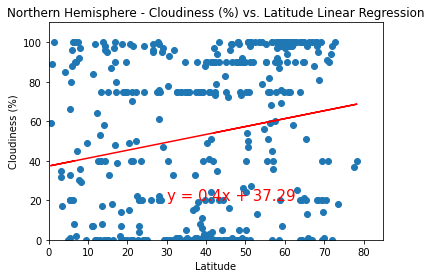

rvalue: 0.19752117845182007
rquared: 0.03901461593699575


<Figure size 432x288 with 0 Axes>

In [32]:
#Northern Hemisphere: cloudiness vs latitude linear regression

x_values = northerndf['Lat']
y_values = northerndf['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlim(0, 85)
plt.ylim(0, 110)
plt.show()

print("rvalue: " + str(rvalue))
print("rquared: " + str(rvalue**2))

plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")


In [ ]:
#Analysis: Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
    #The r-value of 0.19 is not very close to 1, suggesting a weakly positive correlation between cloudiness and latitude in the Northern Hemisphere.
    #The rsquared value of implies that only 3% of the data fits the regression model.
    

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

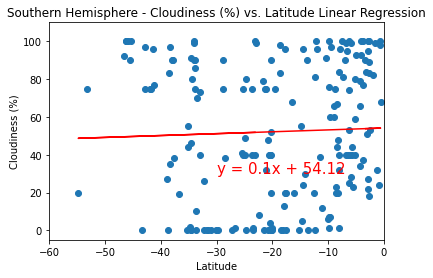

rvalue: 0.0373160524965942
rquared: 0.0013924877739285742


<Figure size 432x288 with 0 Axes>

In [33]:
#Southern Hemisphere: cloudiness vs latitude linear regression

x_values = southerndf['Lat']
y_values = southerndf['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlim(-60,0)
plt.ylim(-5,110)
plt.show()

print("rvalue: " + str(rvalue))
print("rquared: " + str(rvalue**2))

plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

In [36]:
#Analysis: Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
    #The r-value of 0.03 is far from 1, suggesting an extremely weak (almost no correlation) positive correlation between cloudiness and latitude in the Southern Hemisphere.
    #The rsquared value of implies that only .1% of the data fits the regression model.
    

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

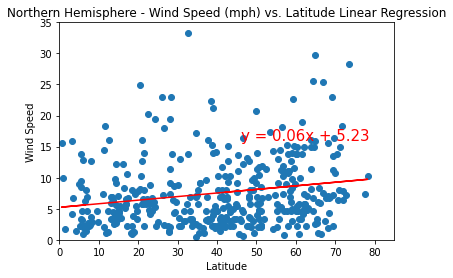

rvalue: 0.19336351158283097
rquared: 0.0373894476116436


<Figure size 432x288 with 0 Axes>

In [34]:
#Northern Hemisphere: wind speed vs latitude linear regression

x_values = northerndf['Lat']
y_values = northerndf['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(46,16),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlim(0, 85)
plt.ylim(0, 35)
plt.show()


print("rvalue: " + str(rvalue))
print("rquared: " + str(rvalue**2))

plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")




In [ ]:
#Analysis: Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
    #The r-value of 0.19 not close to 1, suggesting a weak positive correlation between wind speed and latitude in the Northern Hemisphere.
    #The rsquared value of implies that only 3% of the data fits the regression model.
    

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

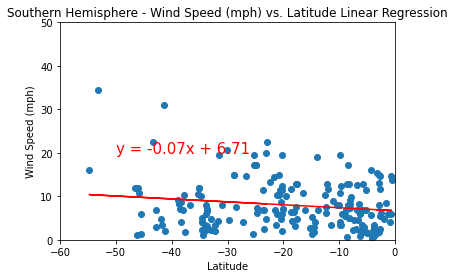

rvalue: -0.16108188077745403
rquared: 0.025947372314801914


<Figure size 432x288 with 0 Axes>

In [37]:
#Southern Hemisphere: wind speed vs latitude linear regression

x_values = southerndf['Lat']
y_values = southerndf['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlim(-60, 0)
plt.ylim(0, 50)
plt.show()

print("rvalue: " + str(rvalue))
print("rquared: " + str(rvalue**2))

plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")


In [ ]:
#Analysis: Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
    #The r-value of -0.16 not close to -1, suggesting a weak negative correlation between wind speed and latitude in the Southern Hemisphere.
    #The rsquared value of implies that only 2% of the data fits the regression model.
    